In [1]:
import numpy as np
from nplm.data_manipulation import create_training_dataset_arXiv
import nplm.neurnetmodel as Neur
from nplm.data_manipulation import one_hot_encode_matrix
from nplm.minimizers import train_model

In [2]:
PATH2FILE = "./arxiv_articles_sample.csv"
CONTEXT_SIZE = 4
DICT_SIZE = 1000

In [3]:
# This takes a while, depending the size of the dataset and the size of the dictionary
dataset, dictionary = create_training_dataset_arXiv(PATH2FILE, CONTEXT_SIZE, DICT_SIZE)

In [4]:
dataset[:10]

[(790, 757, 14, 3),
 (757, 14, 3, 347),
 (1, 0, 196, 19),
 (790, 9, 7, 757),
 (9, 7, 757, 14),
 (7, 757, 14, 16),
 (41, 883, 292, 0),
 (883, 292, 0, 702),
 (292, 0, 702, 939),
 (4, 145, 4, 0)]

## The Neural Network model

In [5]:
np.random.seed(42)
NB_FEATURES = 200
H = 100 # The number of hidden units
BATCH_SIZE = 100
N = Neur.Network([Neur.ProjectVectors(DICT_SIZE, NB_FEATURES),
                  Neur.ConcatProjections(), 
                  Neur.Dense(NB_FEATURES * (CONTEXT_SIZE-1), H), 
                  Neur.Tanh(), Neur.Dense(H, DICT_SIZE)])
#N_a=Neur.Network([N,Neur.Ilogit_and_KL(y)])

In [6]:
N.get_params()
print(len(N.get_params()))

361100


In [7]:
D = np.array(dataset)
X = D[:5000, :3]
Y = D[:5000, -1:]

In [8]:
costs = train_model(N, X, Y, DICT_SIZE, batch_size=300, nb_epochs=100, alpha=1e-3)

Epoch 0 completed. Cost function = 154902.59317606725
Epoch 1 completed. Cost function = 137557.11178860517
Epoch 2 completed. Cost function = 126427.37265589312
Epoch 3 completed. Cost function = 118345.34505901579
Epoch 4 completed. Cost function = 112071.32430031362
Epoch 5 completed. Cost function = 106863.03131045282
Epoch 6 completed. Cost function = 102647.71398602768
Epoch 7 completed. Cost function = 98977.73528909426
Epoch 8 completed. Cost function = 95699.85605577378
Epoch 9 completed. Cost function = 92960.91706971741
Epoch 10 completed. Cost function = 90398.6215337231
Epoch 11 completed. Cost function = 88047.50160744504
Epoch 12 completed. Cost function = 85833.78256970418
Epoch 13 completed. Cost function = 83789.68463981508
Epoch 14 completed. Cost function = 81860.40785016875
Epoch 15 completed. Cost function = 80117.23636271946
Epoch 16 completed. Cost function = 78476.87428738092
Epoch 17 completed. Cost function = 76907.00661424258
Epoch 18 completed. Cost functio

In [9]:
import matplotlib.pyplot as plt

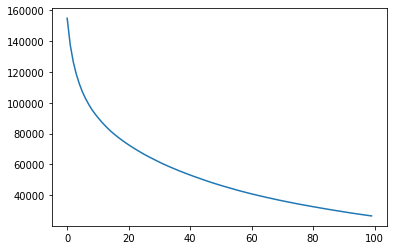

In [10]:
plt.plot(costs)

In [12]:
# Save the trained network (this can be improved)
import pickle

In [13]:
with open("./trained_nplm.pickle", 'wb') as f:
    pickle.dump(N, f)